# Impact of Vaccination on Covid19 Spread Pattern in Different US States




In [1]:
%matplotlib inline

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc


rc('font',**{'family':'serif','serif':['Libertine']})
rc('text', usetex=True)

from pyts.decomposition import SingularSpectrumAnalysis

import stumpy
from matplotlib.patches import Rectangle
import _ucrdtw

In [4]:
confirmed_cases_data = pd.read_csv("US_COVID_Cases_Scaled_SMA.csv")

In [5]:
vaccine_data = pd.read_csv("US_Vaccine_Full_Post_Stage_Scaled_SMA.csv")

# Singular Spectrum Analysis

#### Time series Decomposition: Find the seasonality , trend and so on.
#### Anamoly Detection : shows the differences , dissimilarities, outliers.



In [33]:
window_size=7   #7 days

In [34]:
Final_States = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina',
 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [35]:
#Anomaly detection for Early Stage for Confirmed Cases

In [39]:
#Applying SSA
ssa = SingularSpectrumAnalysis(window_size=7)   
X_ssa = ssa.fit_transform(confirmed_cases_data)

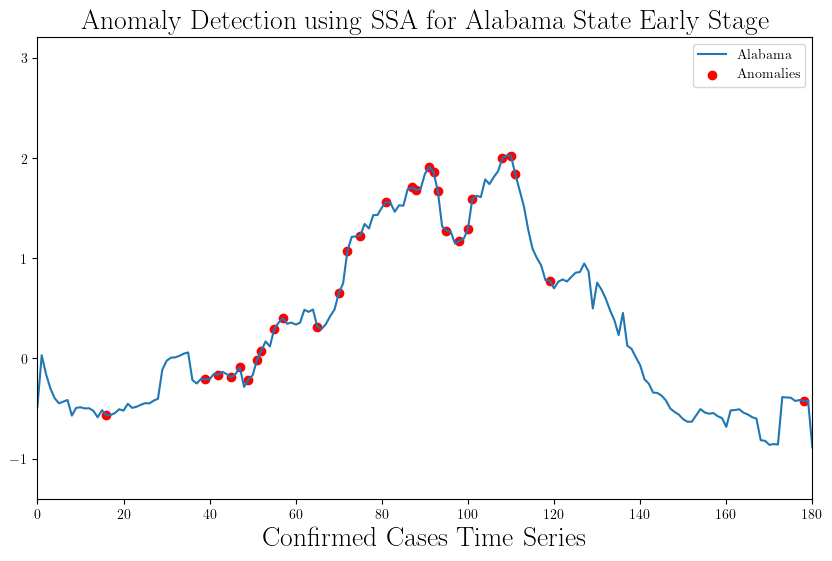

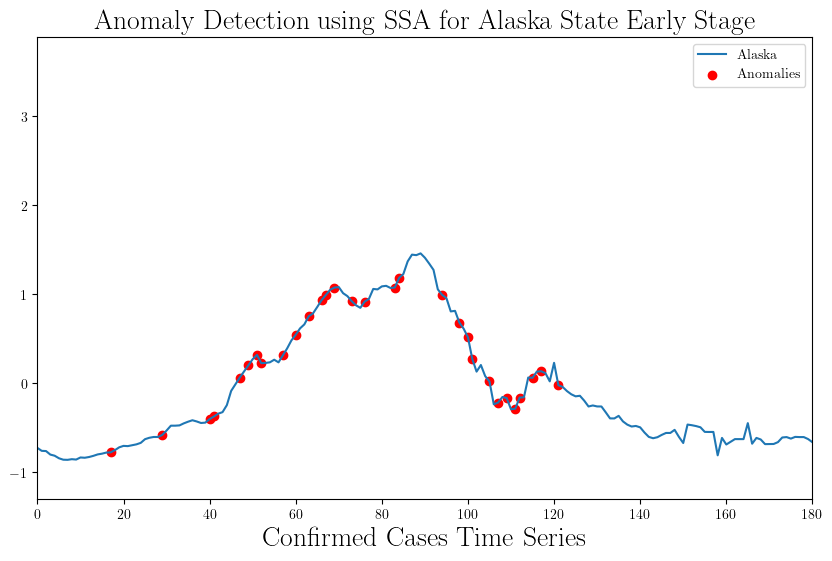

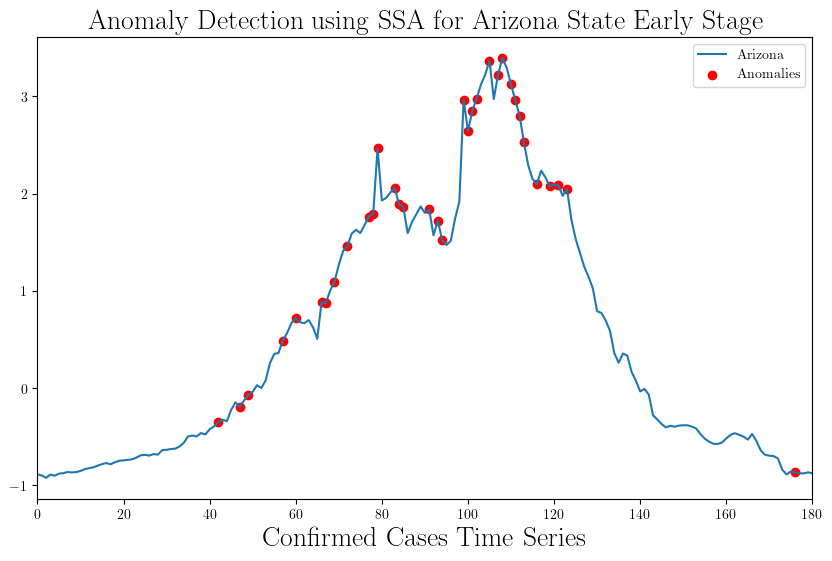

In [40]:
for i in range(0,3):#50 states, I put justr three in order to simplify codes here.
        # Reconstruct the time series
        reconstructed_series = np.sum(X_ssa, axis=1)
        
        # Calculate residuals (differences between original and reconstructed)
        residuals = confirmed_cases_data.iloc[:,i] - reconstructed_series[:,i]
        
        # Set a threshold for anomaly detection
        threshold = 1.5 * np.std(residuals)  
        
        # Detect anomalies
        anomalies = np.where(np.abs(residuals) > threshold)[0]
        
        # Plotting
        plt.figure(figsize=(10, 6))
        plt.plot(confirmed_cases_data.iloc[:,i], label=f'{confirmed_cases_data.columns[i]}')
        #plt.plot(reconstructed_series[:,i], label='Reconstructed Data', linestyle='dashed')
        plt.scatter(anomalies, confirmed_cases_data.iloc[:, i][anomalies], color='red', marker='o', label='Anomalies')
        plt.legend()
        
        plt.title(f'Anomaly Detection using SSA for {confirmed_cases_data.columns[i]} State Early Stage' , fontsize=20)
        plt.xlabel('Confirmed Cases Time Series' ,fontsize=20)
        
        plt.xlim(0,180)
        
        
plt.show()

In [ ]:
#Anomaly detection for Middle Stage for Confirmed Case

In [ ]:
#Anomaly detection for Post Stage for Confirmed Cases

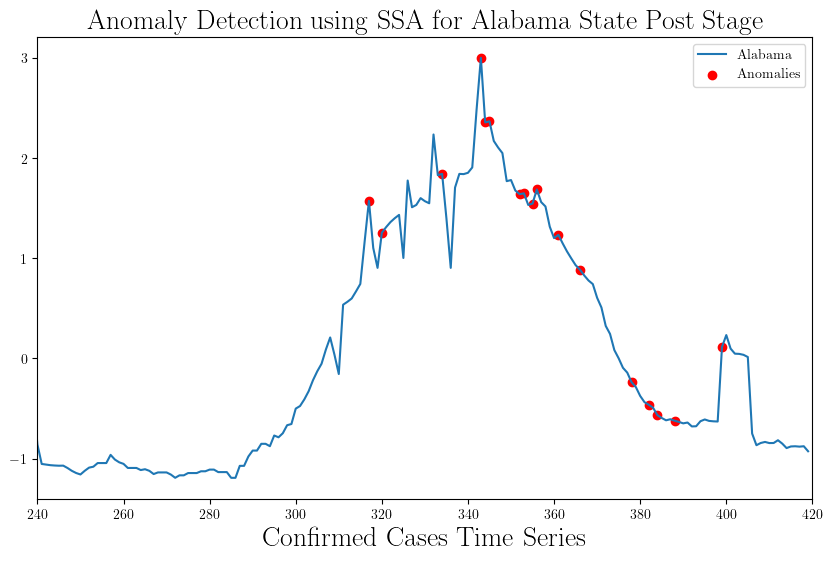

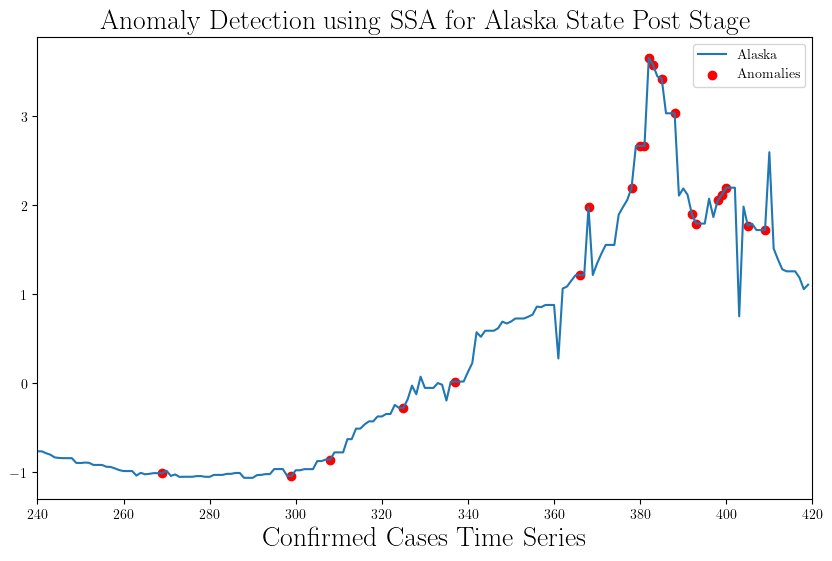

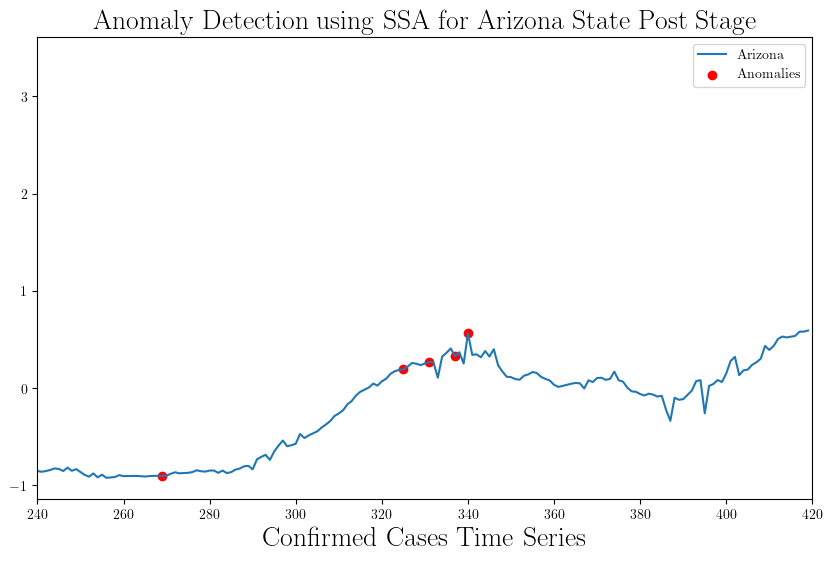

In [45]:
for i in range(0,3):#50 states, I put justr three in order to simplify codes here.
    # Reconstruct the time series
    reconstructed_series = np.sum(X_ssa, axis=1)

    # Calculate residuals (differences between original and reconstructed)
    residuals = confirmed_cases_data.iloc[:,i] - reconstructed_series[:,i]

    # Set a threshold for anomaly detection
    threshold = 1.5 * np.std(residuals) 

    # Detect anomalies
    anomalies = np.where(np.abs(residuals) > threshold)[0]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(confirmed_cases_data.iloc[:,i], label=f'{confirmed_cases_data.columns[i]}')
    #plt.plot(reconstructed_series[:,i], label='Reconstructed Data', linestyle='dashed')
    plt.scatter(anomalies, confirmed_cases_data.iloc[:, i][anomalies], color='red', marker='o', label='Anomalies')
    plt.legend()

    plt.title(f'Anomaly Detection using SSA for {confirmed_cases_data.columns[i]} State Post Stage' , fontsize=20)
    plt.xlabel('Confirmed Cases Time Series' ,fontsize=20)

    plt.xlim(240, 420)


plt.show()

## Matrix Profile -- Anamoly Detection 

In [6]:
query = confirmed_cases_data.iloc[:, :] 

In [ ]:
#MP Confirmed Cases Early Stage 

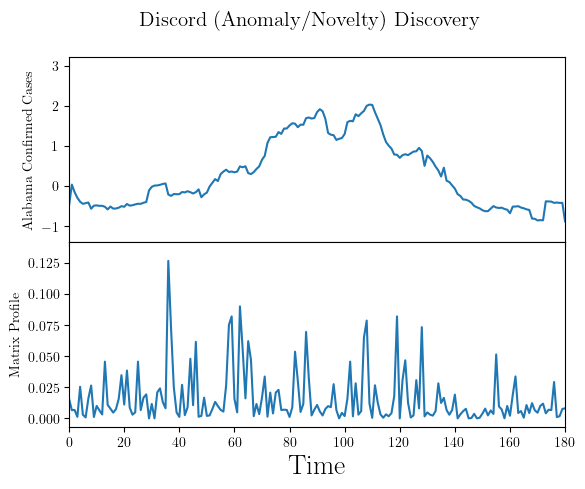

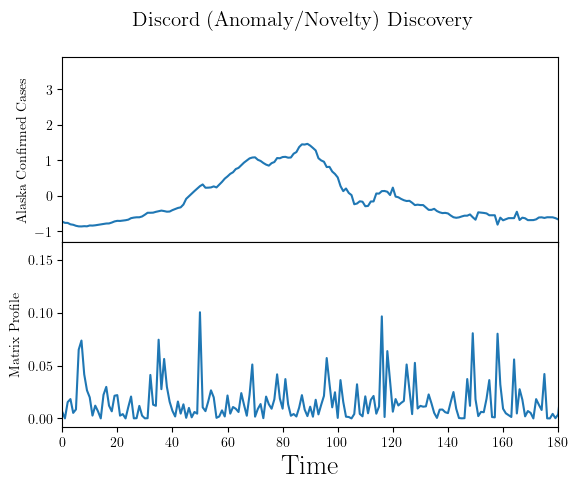

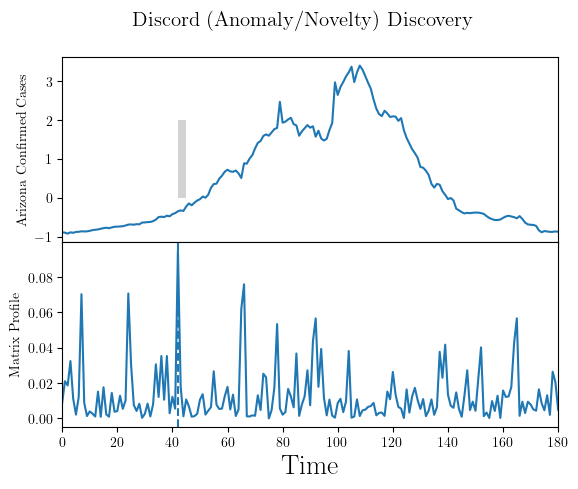

In [9]:
for i in range(0, 3): # number of states
        
        data_array = confirmed_cases_data.iloc[:,:].values
        query_array = query.iloc[:,:].values  
        
        
        matrix_profile = stumpy.stump(data_array[:,i], m=window_size) 
        discord_idx = np.argmax(matrix_profile[:, 0]) # Computing anomoly detection point 
         
        fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
        plt.suptitle('Discord (Anomaly/Novelty) Discovery', fontsize='15')
        axs[0].plot(data_array[:,i])
        axs[0].set_ylabel(f'{confirmed_cases_data.columns[i]} Confirmed Cases', fontsize='10')
        axs[0].set_xlim([0, 180]) 
        rect = Rectangle((discord_idx, 0), window_size, 2, facecolor='lightgrey') #neigherest neighbor range for anamoly detection
        axs[0].add_patch(rect)
        axs[1].set_xlabel('Time', fontsize ='20')
        axs[1].set_ylabel('Matrix Profile', fontsize='10')
        axs[1].axvline(x=discord_idx, linestyle="dashed") #showing the anamoly detecting point
        axs[1].plot(matrix_profile[:, 0])
        
    
        
        plt.show()

In [ ]:
#MP Confirmed Cases Middle Stage

In [ ]:
#MP Confirmed Cases Post Stage

In [ ]:
#MP  Vaccine Cases

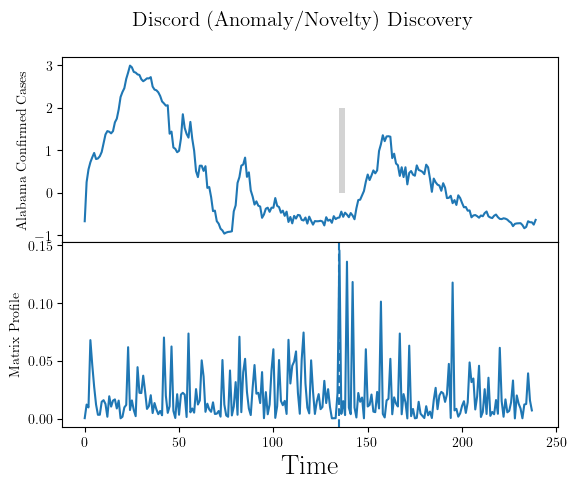

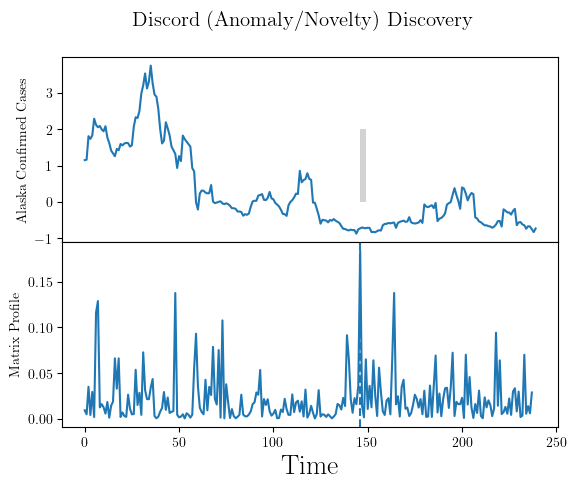

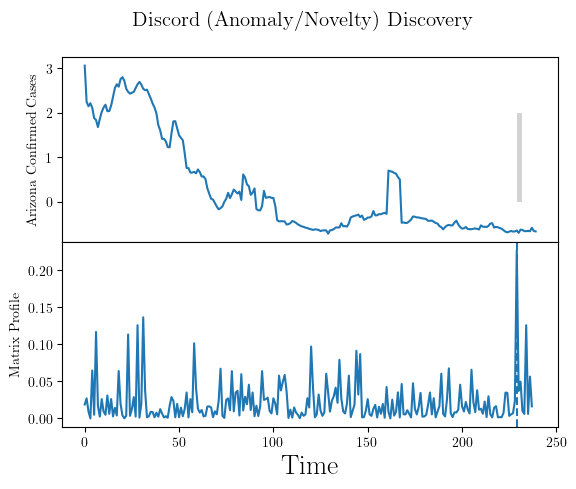

In [12]:
 for i in range(0,3):#50 states, I put justr three in order to simplify codes here.
    
        query = vaccine_data.iloc[:, :]
        data_array = vaccine_data.iloc[:,:].values
        query_array = query.iloc[:,:].values
        loc, dist = _ucrdtw.ucrdtw(data_array, query_array, window_size, True) 
        
        matrix_profile = stumpy.stump(data_array[:,i], m=window_size)
        discord_idx = np.argmax(matrix_profile[:, 0])
         
        fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
        plt.suptitle('Discord (Anomaly/Novelty) Discovery', fontsize='15')
        axs[0].plot(data_array[:,i])
        axs[0].set_ylabel(f'{confirmed_cases_data.columns[i]} Confirmed Cases', fontsize='10')
        #axs[0].set_xlim([240, 420])
        rect = Rectangle((discord_idx, 0), window_size, 2, facecolor='lightgrey')
        axs[0].add_patch(rect)
        axs[1].set_xlabel('Time', fontsize ='20')
        axs[1].set_ylabel('Matrix Profile', fontsize='10')
        axs[1].axvline(x=discord_idx, linestyle="dashed")
        axs[1].plot(matrix_profile[:, 0])
        
        

        
        plt.show()

## Matrix Profile -- Anamoly Detection -- Multidimensional

In [14]:
cluster_labels_df = pd.read_csv("Cluster_Labels_for_all_stages.csv") 


In [15]:
unique_labels = cluster_labels_df[cluster_labels_df.columns[1]]


In [16]:
all_state_clusters = {}

for cluster_l in range(1, 17):  # Iterate through cluster labels from 1 to 16
    indices_in_cluster = [] #Extracting number of clusters to add states exist in each cluster for plotting 
    for idx, label in enumerate(unique_labels):
        if label == cluster_l:
            indices_in_cluster.append(idx)
    all_state_clusters[cluster_l] = indices_in_cluster

In [17]:
list_of_clusters = [indices for indices in all_state_clusters.values()]


In [18]:
data_array = confirmed_cases_data.iloc[:,:].values

keys_list = list(all_state_clusters.keys())

In [ ]:
#Multidimensional MP Confirmed Cases Early Stage

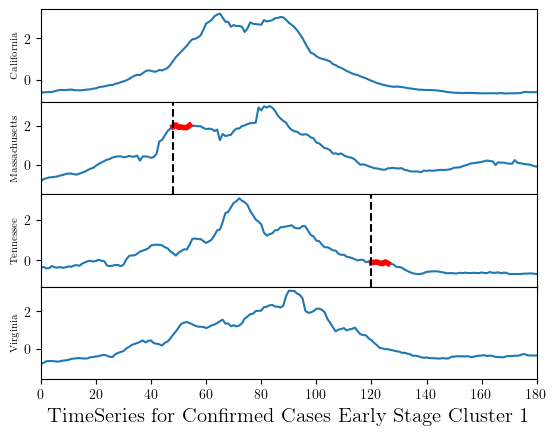

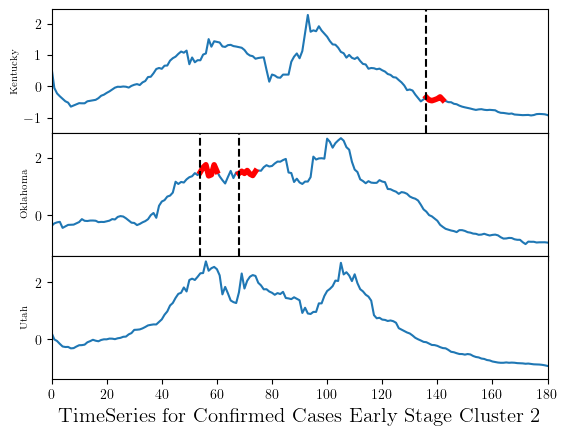

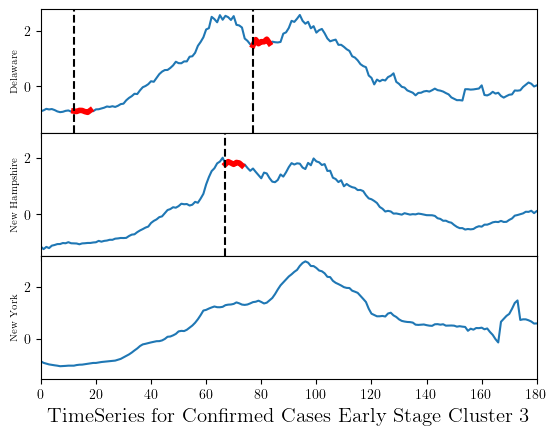

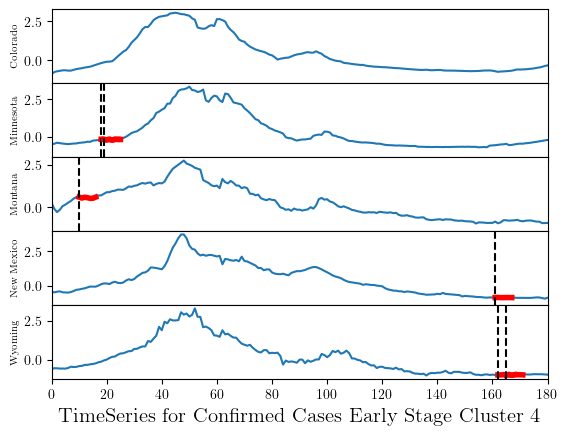

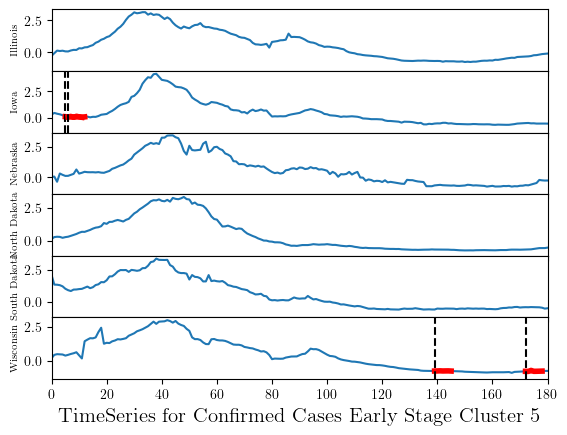

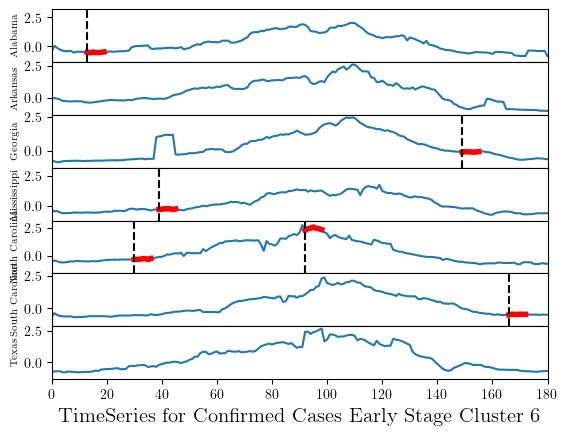

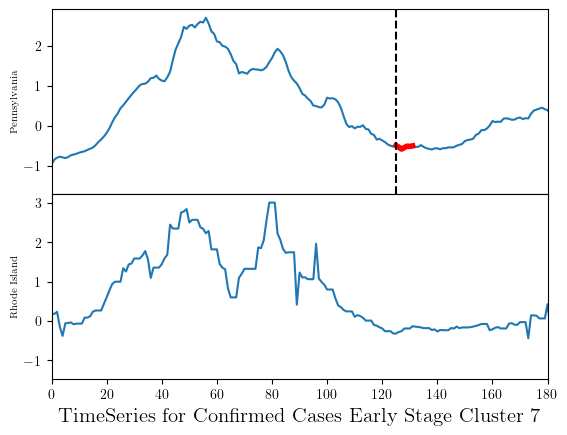

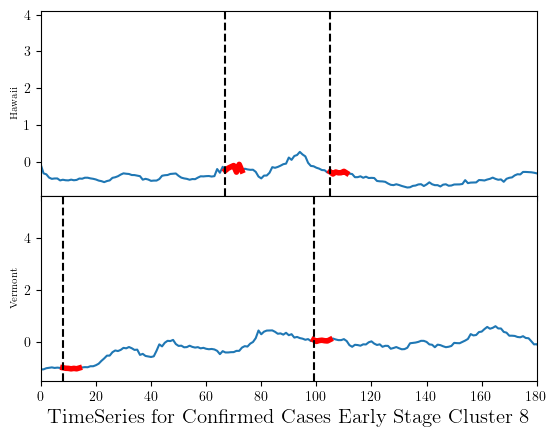

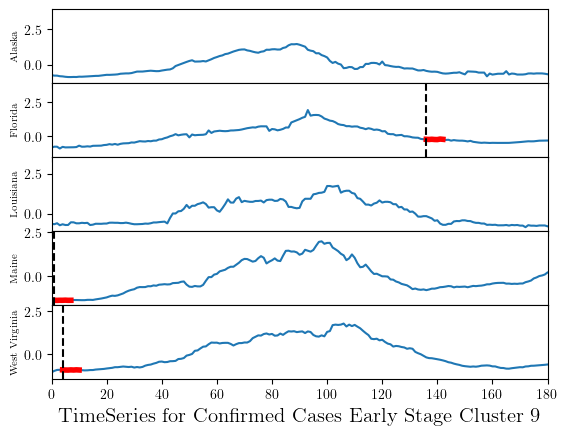

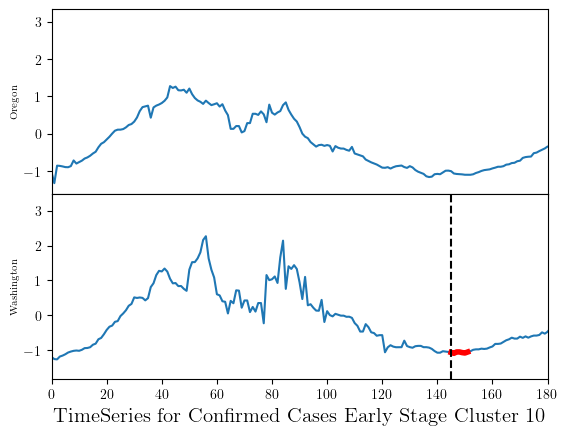

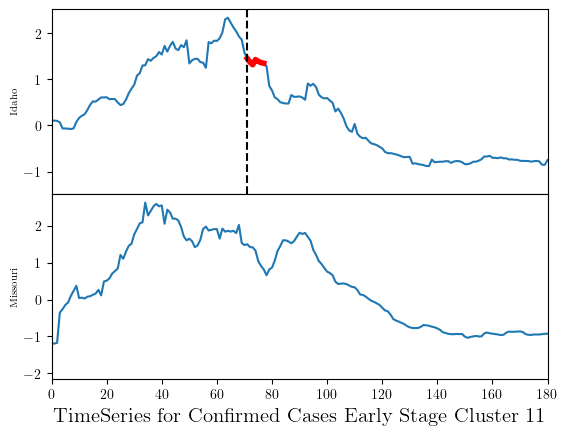

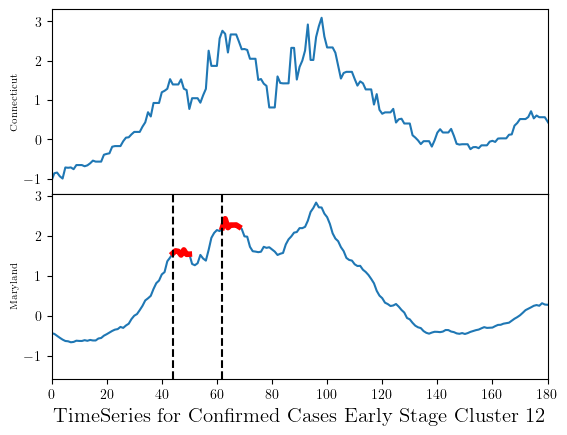

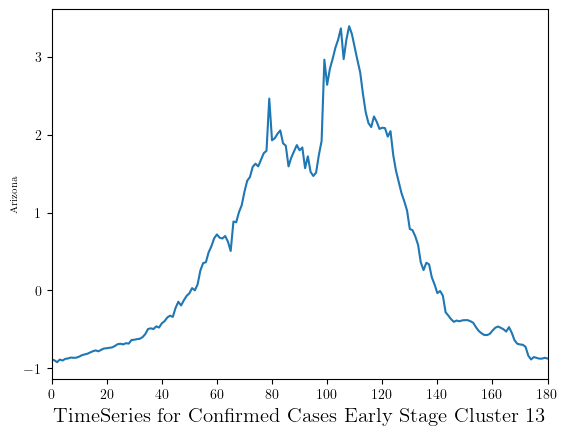

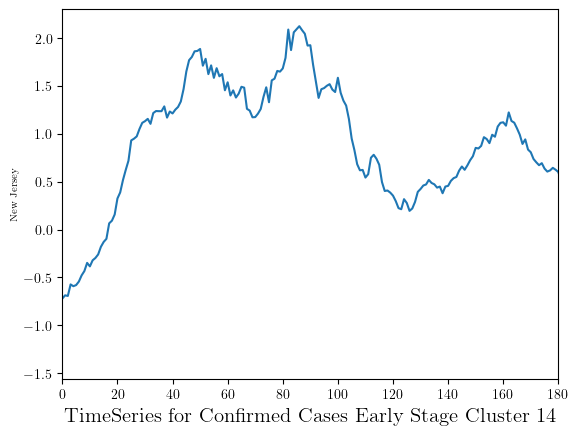

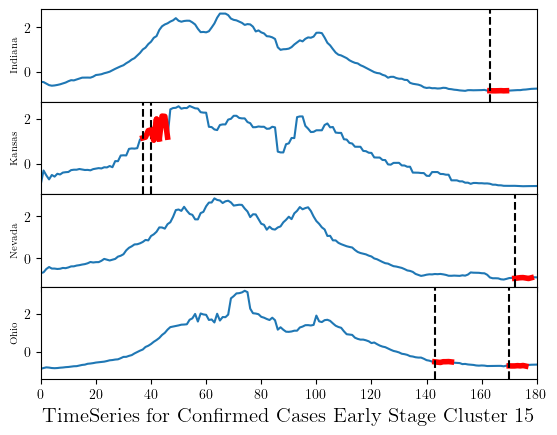

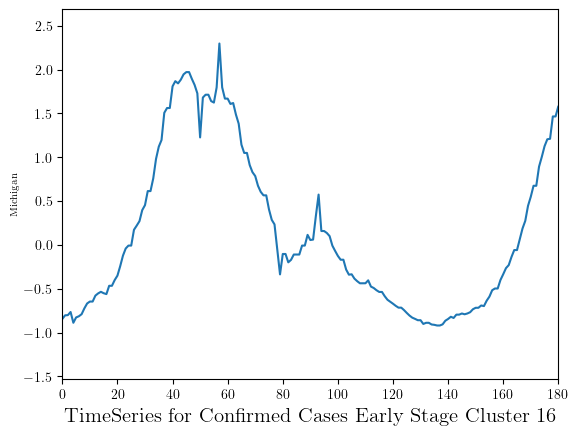

In [21]:
for cluster_idx, selected_columns in enumerate(list_of_clusters): #columns that should be plotted
        query = confirmed_cases_data.iloc[:, selected_columns] # choosing a chunk of dataset for computing MP
        query_array = query.iloc[:,:].values
        if len(selected_columns) >1: #plotting for clusters that have more than one state
            m = 7 #windowsize
            mps = {}  # Store the 1-dimensional matrix profiles
            discords_idx = {}  # Store the index locations for each pair of 1-dimensional discords (i.e., the index location of two largest matrix profile values within each dimension)
            for dim_name in query.columns:
                mps[dim_name] = stumpy.stump(query[dim_name], m) #matrixprofile 
                discords_idx[dim_name] = np.argsort(mps[dim_name][:, 0])[-2:]  #computing discords
                #loc, dist = _ucrdtw.ucrdtw(data_array, query_array, window_size, True) #computing  : I have no idea how to implement this pat to my codes
        
    
            fig, axs = plt.subplots(len(mps), sharex=True, gridspec_kw={'hspace': 0})
            for i, dim_name in enumerate(list(mps.keys())):
                axs[i].set_ylabel(dim_name, fontsize='7')
                axs[i].plot(query[dim_name])
                axs[i].set_xlabel(f'TimeSeries for Confirmed Cases Early Stage Cluster {cluster_idx+1}', fontsize ='15')
                axs[i].set_xlim([0, 180])
                for idx in discords_idx[dim_name]:
                    axs[i].plot(query[dim_name].iloc[idx:idx+m], c='red', linewidth=4)
                    axs[i].axvline(x=idx, linestyle="dashed", c='black')
                    
        else:
            mps = stumpy.stump(confirmed_cases_data.iloc[:, selected_columns[0]], m=7)
            discords_idx = np.argsort(mps[:, 0])[-2:] 
            
            fig, ax = plt.subplots(1, sharex=True, gridspec_kw={'hspace': 0})
            ax.set_ylabel(confirmed_cases_data.columns[selected_columns[0]], fontsize='7')
            ax.plot(query)
            ax.set_xlabel(f'TimeSeries for Confirmed Cases Early Stage Cluster {cluster_idx+1}', fontsize='15')
            ax.set_xlim([0, 180])
            
            for idx in discords_idx:
                ax.plot(range(idx, idx+m), query.iloc[idx:idx+m], c='red', linewidth=4)
                ax.axvline(x=idx, linestyle="dashed", c='black')
             
        plt.show()
           

In [ ]:
#Multidimensional MP Confirmed Cases Post Stage

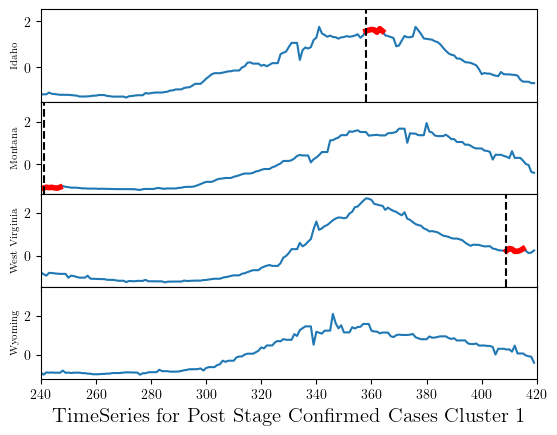

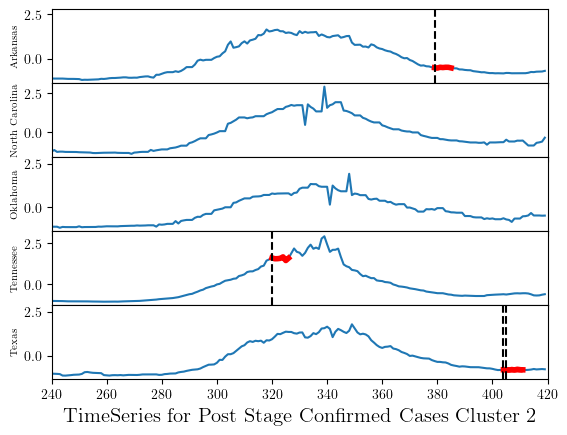

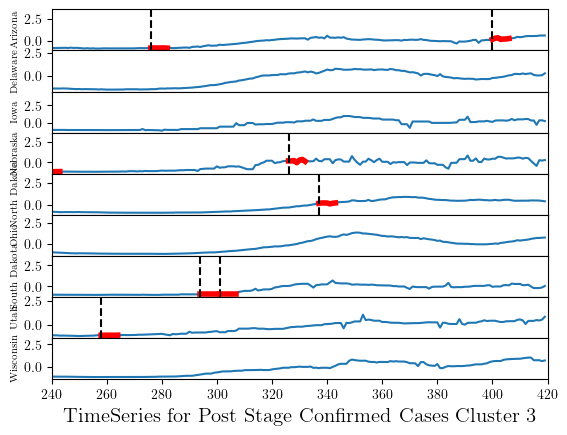

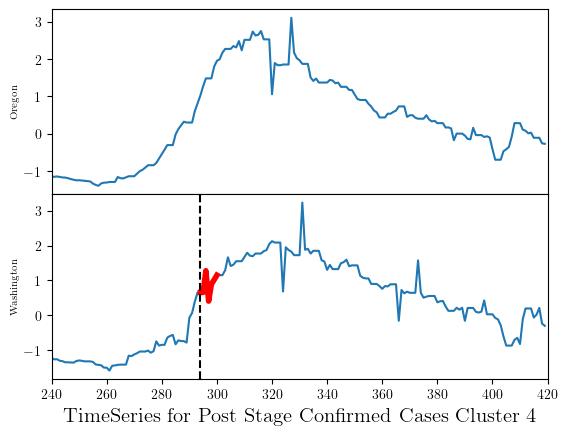

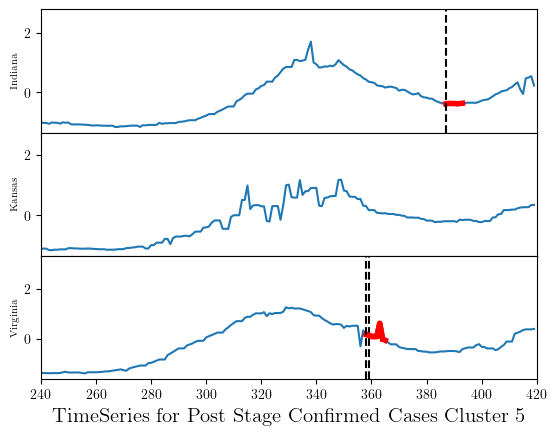

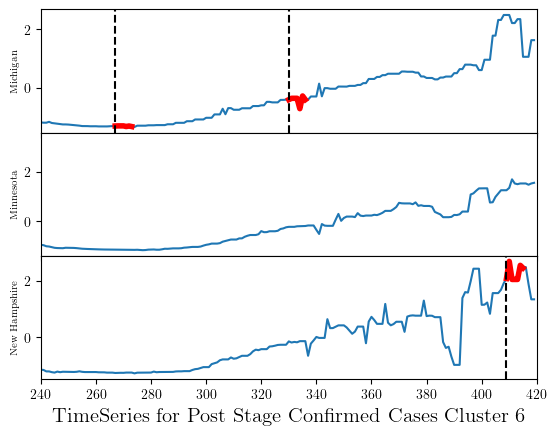

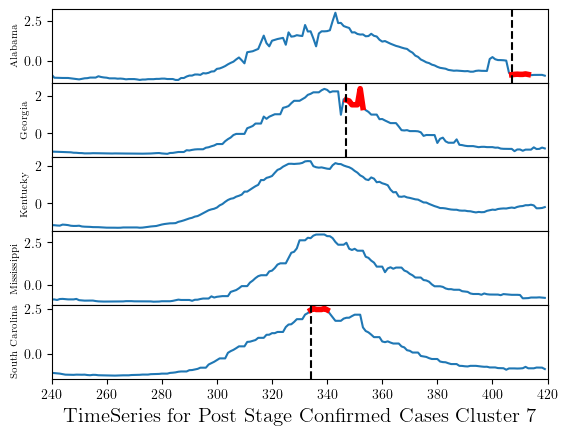

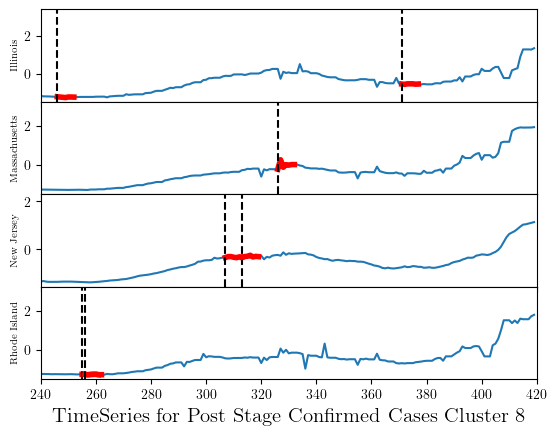

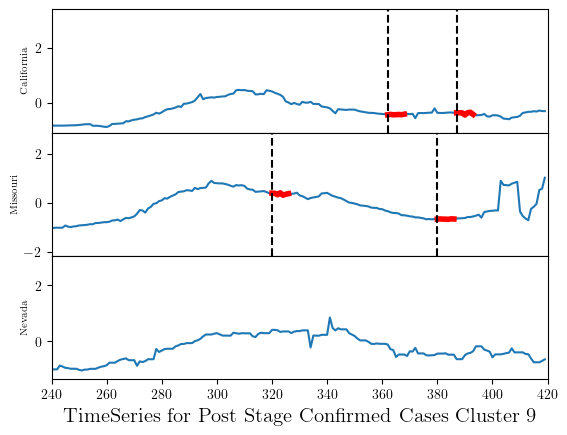

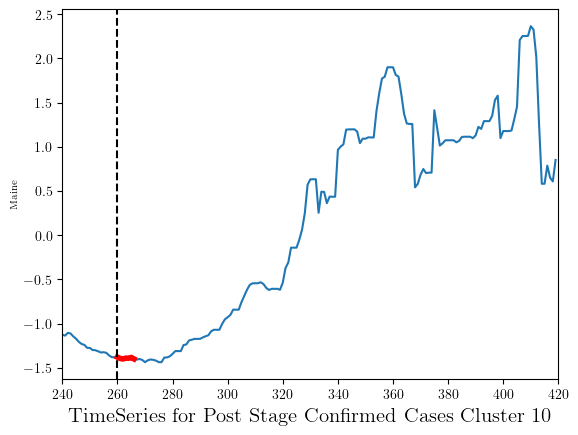

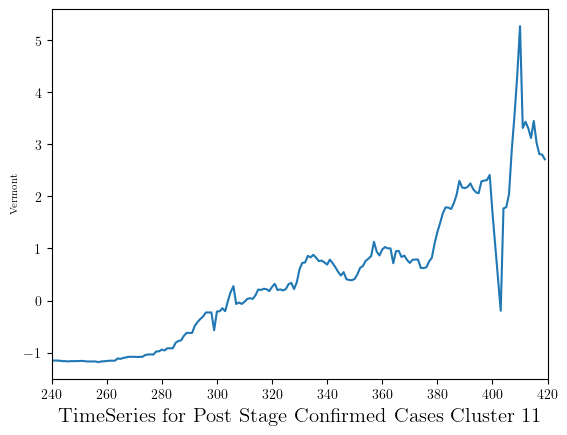

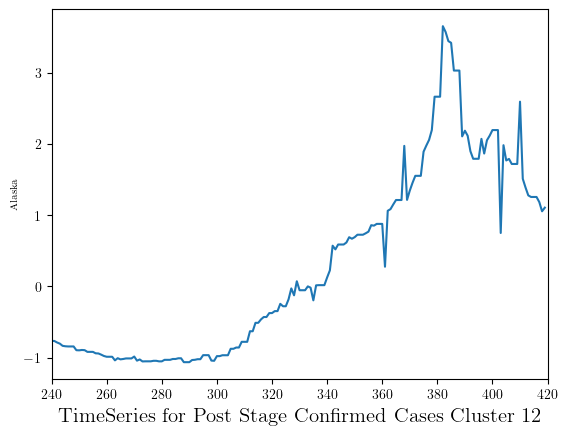

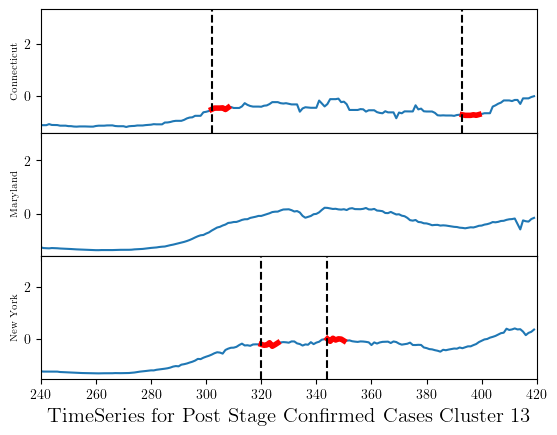

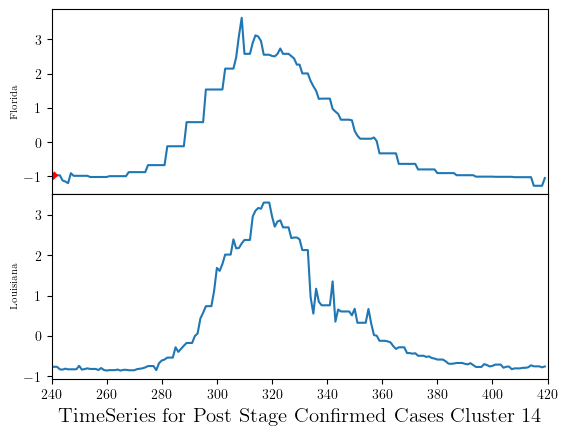

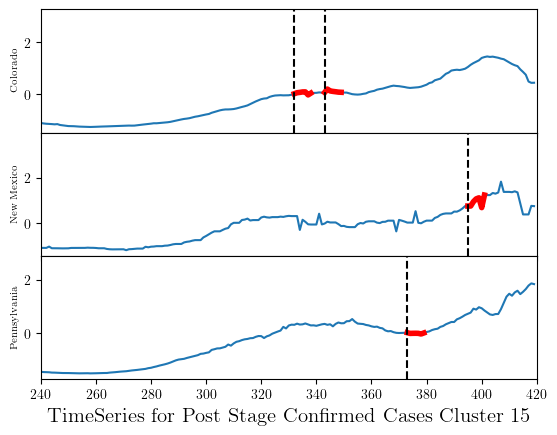

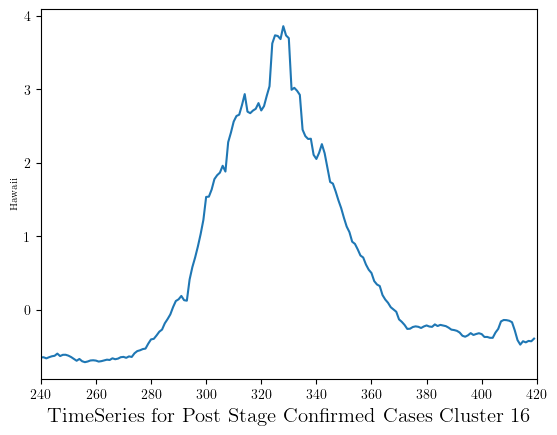

In [25]:
unique_labels = cluster_labels_df[cluster_labels_df.columns[2]]
           
all_state_clusters = {}

for cluster_l in range(1, 17):  # Iterate through cluster labels from 1 to 16
    indices_in_cluster = []
    for idx, label in enumerate(unique_labels):
        if label == cluster_l:
            indices_in_cluster.append(idx)
    all_state_clusters[cluster_l] = indices_in_cluster

list_of_clusters = [indices for indices in all_state_clusters.values()]


data_array = confirmed_cases_data.iloc[:,:].values


keys_list = list(all_state_clusters.keys())

for cluster_idx, selected_columns in enumerate(list_of_clusters):
    query = confirmed_cases_data.iloc[:, selected_columns] # choosing a chunk of dataset for computing MP
    query_array = query.iloc[:,:].values
    if len(selected_columns) >1:
        m = 7
        mps = {}  # Store the 1-dimensional matrix profiles
        discords_idx = {}  # Store the index locations for each pair of 1-dimensional discords (i.e., the index location of two largest matrix profile values within each dimension)
        for dim_name in query.columns:
            mps[dim_name] = stumpy.stump(query[dim_name], m)
            discords_idx[dim_name] = np.argsort(mps[dim_name][:, 0])[-2:]
            #loc, dist = _ucrdtw.ucrdtw(data_array, query_array, window_size, True) #computing  : I have no idea how to implement this pat to my codes


        fig, axs = plt.subplots(len(mps), sharex=True, gridspec_kw={'hspace': 0})
        for i, dim_name in enumerate(list(mps.keys())):
            axs[i].set_ylabel(dim_name, fontsize='7')
            axs[i].plot(query[dim_name])
            axs[i].set_xlabel(f'TimeSeries for Post Stage Confirmed Cases Cluster {cluster_idx+1} ', fontsize ='15')
            axs[i].set_xlim([240, 420])
            for idx in discords_idx[dim_name]:
                axs[i].plot(query[dim_name].iloc[idx:idx+m], c='red', linewidth=4)
                axs[i].axvline(x=idx, linestyle="dashed", c='black')


    else:
        mps = stumpy.stump(confirmed_cases_data.iloc[:, selected_columns[0]], m=7)
        discords_idx = np.argsort(mps[:, 0])[-2:]


        fig, ax = plt.subplots(1, sharex=True, gridspec_kw={'hspace': 0})
        ax.set_ylabel(confirmed_cases_data.columns[selected_columns[0]], fontsize='7')
        ax.plot(query)
        ax.set_xlabel(f'TimeSeries for Post Stage Confirmed Cases Cluster {cluster_idx+1}', fontsize='15')
        ax.set_xlim([240, 420])

        for idx in discords_idx:
            ax.plot(range(idx, idx+m), query.iloc[idx:idx+m], c='red', linewidth=4)
            ax.axvline(x=idx, linestyle="dashed", c='black')

     
        
    plt.show()
        

In [26]:
#Multidimensional MP Post Stage Vaccine

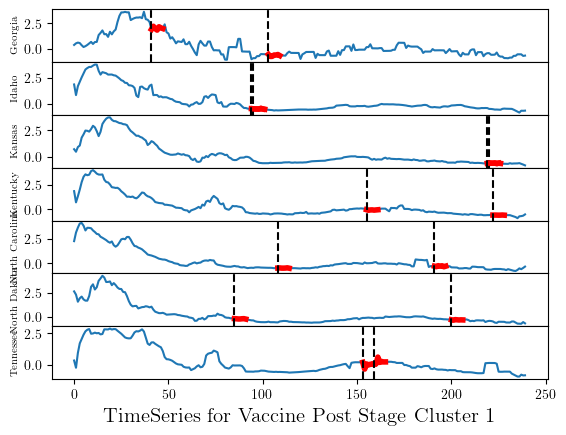

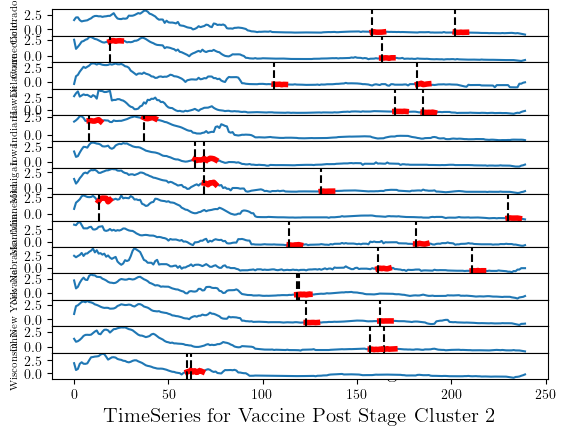

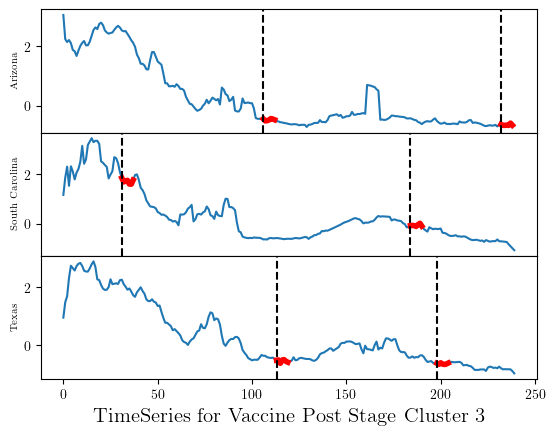

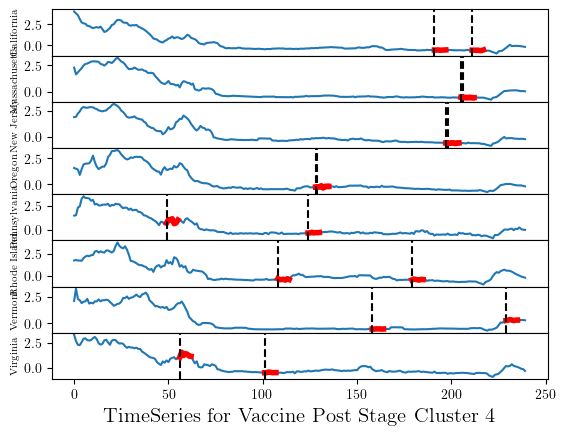

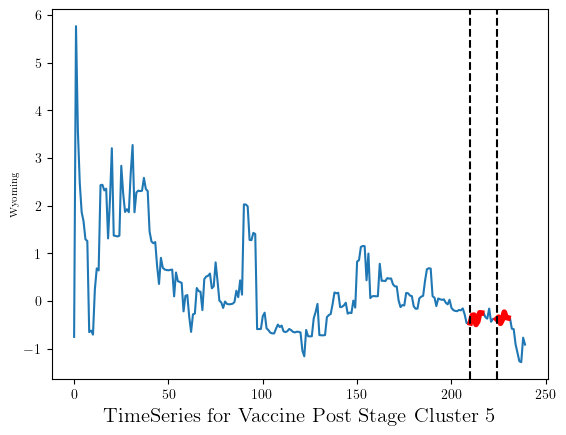

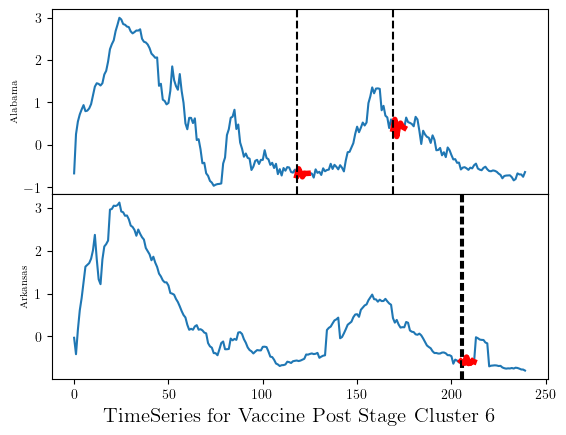

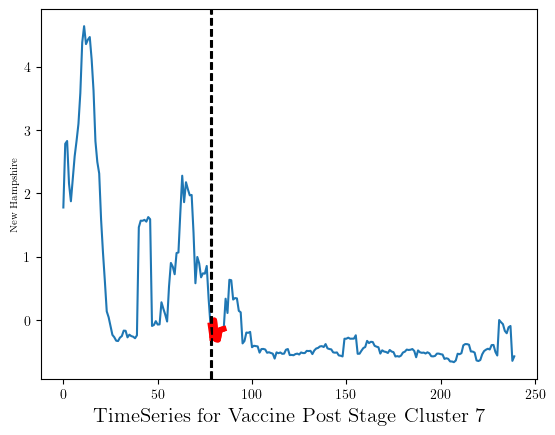

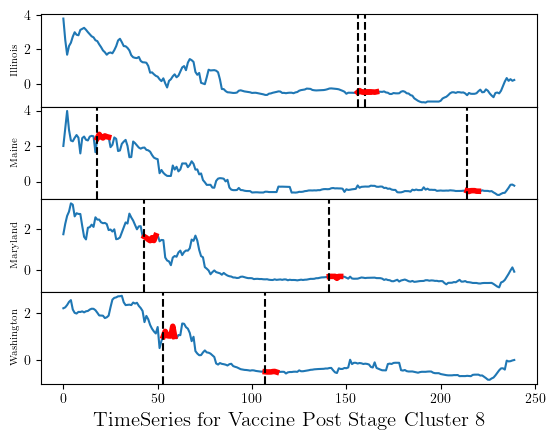

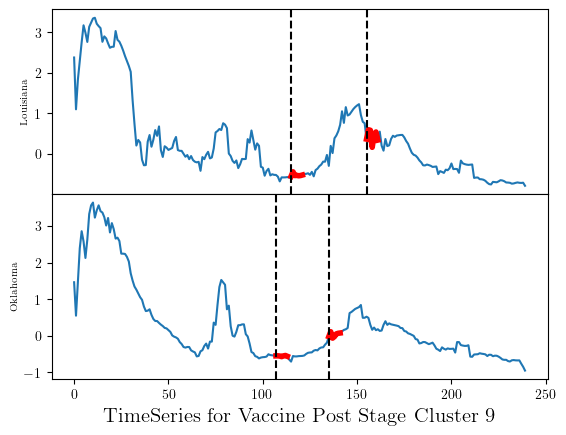

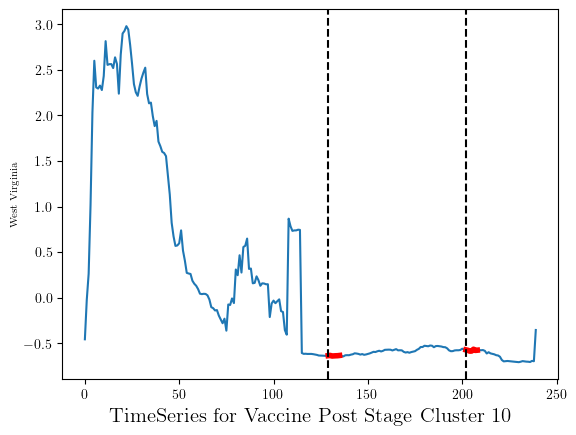

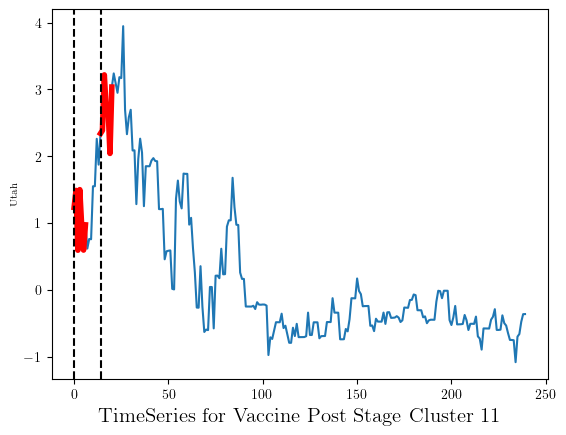

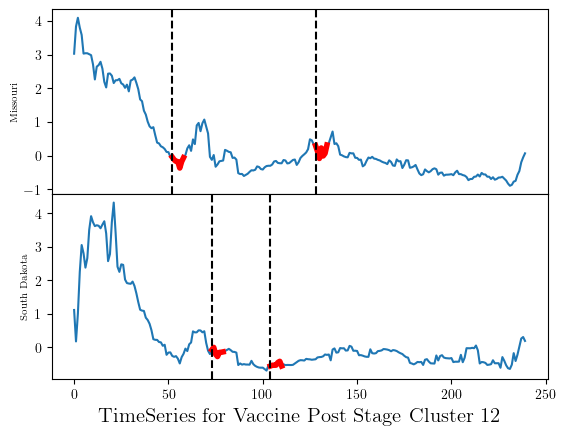

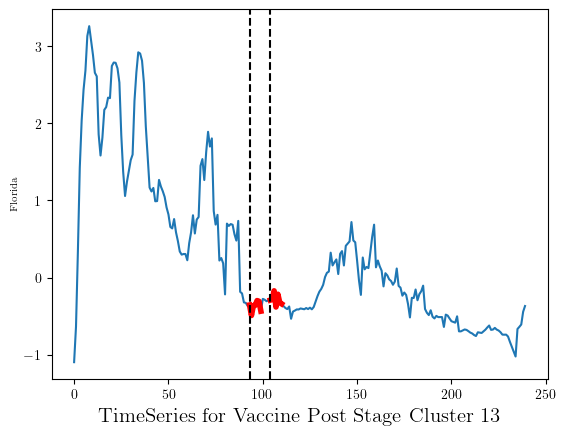

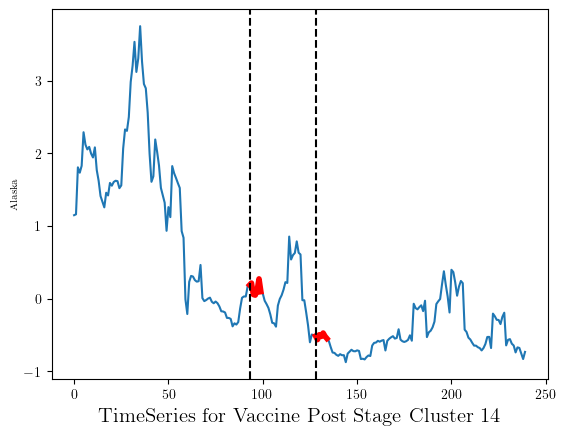

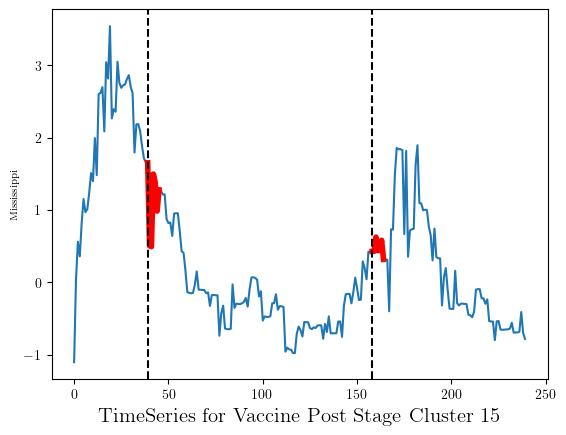

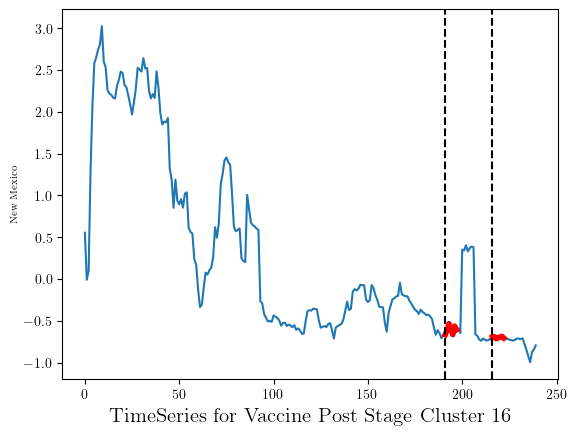

In [27]:

unique_labels = cluster_labels_df[cluster_labels_df.columns[3]]

all_state_clusters = {}
     
for cluster_l in range(1, 17):  # Iterate through cluster labels from 1 to 16
    indices_in_cluster = []
    for idx, label in enumerate(unique_labels):
        if label == cluster_l:
            indices_in_cluster.append(idx)
    all_state_clusters[cluster_l] = indices_in_cluster

list_of_clusters = [indices for indices in all_state_clusters.values()]


data_array = vaccine_data.iloc[:,:].values

keys_list = list(all_state_clusters.keys())

for cluster_idx, selected_columns in enumerate(list_of_clusters):
    query = vaccine_data.iloc[:, selected_columns] # choosing a chunk of dataset for computing MP
    query_array = query.iloc[:,:].values
    if len(selected_columns) >1:
        m = 7
        mps = {}  # Store the 1-dimensional matrix profiles
        discords_idx = {}  # Store the index locations for each pair of 1-dimensional discords (i.e., the index location of two largest matrix profile values within each dimension)
        for dim_name in query.columns:
            mps[dim_name] = stumpy.stump(query[dim_name], m)
            discords_idx[dim_name] = np.argsort(mps[dim_name][:, 0])[-2:]
            #loc, dist = _ucrdtw.ucrdtw(data_array, query_array, window_size, True) #computing  : I have no idea how to implement this pat to my codes


        fig, axs = plt.subplots(len(mps), sharex=True, gridspec_kw={'hspace': 0})
        for i, dim_name in enumerate(list(mps.keys())):
            axs[i].set_ylabel(dim_name, fontsize='7')
            axs[i].plot(query[dim_name])
            axs[i].set_xlabel(f'TimeSeries for Vaccine Post Stage Cluster {cluster_idx+1}', fontsize ='15')
            for idx in discords_idx[dim_name]:
                axs[i].plot(query[dim_name].iloc[idx:idx+m], c='red', linewidth=4)
                axs[i].axvline(x=idx, linestyle="dashed", c='black')


    else:
        mps = stumpy.stump(vaccine_data.iloc[:, selected_columns[0]], m=7)
        discords_idx = np.argsort(mps[:, 0])[-2:]

        fig, ax = plt.subplots(1, sharex=True, gridspec_kw={'hspace': 0})
        ax.set_ylabel(vaccine_data.columns[selected_columns[0]], fontsize='7')
        ax.plot(query)
        ax.set_xlabel(f'TimeSeries for Vaccine Post Stage Cluster {cluster_idx+1}', fontsize='15')


        for idx in discords_idx:
            ax.plot(range(idx, idx+m), query.iloc[idx:idx+m], c='red', linewidth=4)
            ax.axvline(x=idx, linestyle="dashed", c='black')

   
        
    plt.show()

# Matrix Profile -- Segmentation

In [ ]:
# FLUSS employs a sliding window approach to calculate local motifs and discords, 
# similar to how the matrix profile is computed.
# By analyzing the matrix profile, FLUSS can detect changes in pattern similarity 
# and identify segments that exhibit different behaviors or characteristics within a time series. 

In [28]:
#MP  Confirmed Cases Segmentation

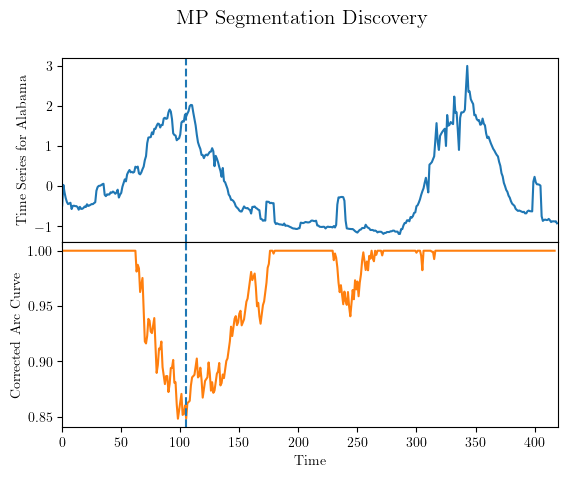

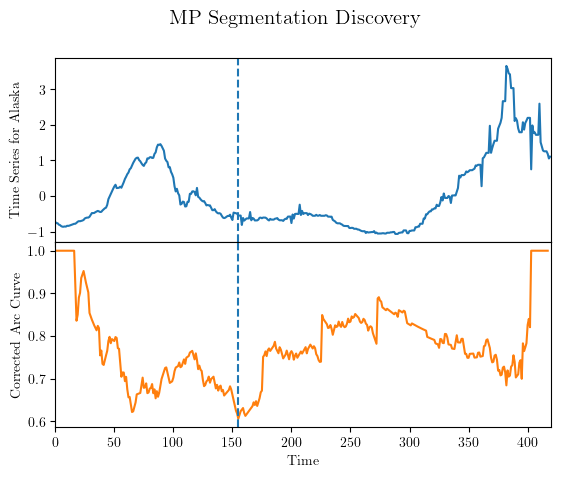

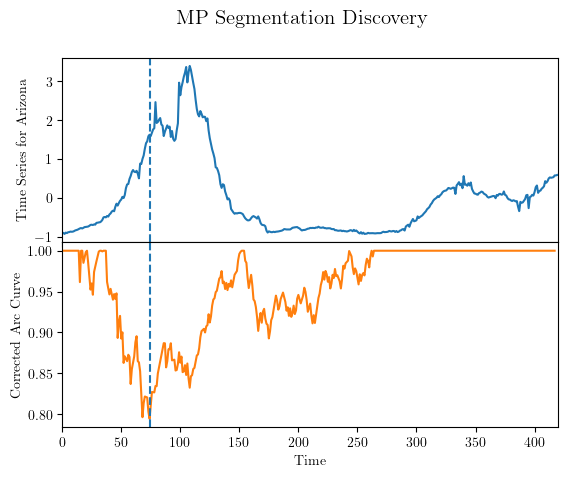

In [29]:
data_array = confirmed_cases_data.iloc[:,:].values
query_array = query.iloc[:,:].values # it didnt work when I put number in it (e.g: Early stage range)
loc, dist = _ucrdtw.ucrdtw(data_array, query_array, window_size , True) #computing DTW

for i in range(0,3):
    matrix_profile = stumpy.stump(data_array[: , i], m= window_size)

    subseq_len = window_size
    correct_arc_curve, regime_locations = stumpy.fluss(matrix_profile[:, 1],
                                                    L=subseq_len,
                                                    n_regimes=5,
                                                    excl_factor=5
                                                    ) #computing segmentation 



    fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
    plt.suptitle('MP Segmentation Discovery', fontsize='15')
    axs[0].plot(data_array[:,  i])
    axs[0].axvline(x=regime_locations[0], linestyle="dashed") 
    axs[0].set_xlim([0, len(data_array) ])
    axs[0].set_ylabel(f'Time Series for {confirmed_cases_data.columns[i]}', fontsize='10')

    axs[1].plot(range(correct_arc_curve.shape[0]), correct_arc_curve, color='C1')
    axs[1].axvline(x=regime_locations[0], linestyle="dashed")
    axs[1].set_xlabel('Time', fontsize='10')
    axs[1].set_ylabel('Corrected Arc Curve', fontsize='10')


    plt.show()

In [30]:
#MP Vaccine data Segmentation

## Location for Segmentation

In [52]:
for i in range(0,50):
    matrix_profile = stumpy.stump(data_array[: , i], m= window_size)

    subseq_len = window_size
    correct_arc_curve, regime_locations = stumpy.fluss(matrix_profile[:, 1],
                                                    L=subseq_len,
                                                    n_regimes=5,
                                                    excl_factor=5
                                                    )
            
mean_value = np.mean(regime_locations)
min_value = np.min(regime_locations)
max_value = np.max(regime_locations)

print(f"Mean Value of Location: {mean_value}")
print(f"Min Value of Location: {min_value}")
print(f"Max Value of Location: {max_value}")
    
    

Mean Value of Location: 105.25
Min Value of Location: 0
Max Value of Location: 193


In [51]:
# Mean value of Location for Confirmed Cases: 103.75
# Min Value of Location for Confirmed Cases: 35
# Max Value of Location for Confirmed Cases: 165